# Part1: Data Preparation

## 1.0 Data Preprocessing in Python for statistical modeling

In [33]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [34]:
# Import Dataset in python
# Setting up workong directory
# We are using pandas to read csv file into a dataframe. Dataframe is similar in python and R
dataset = pd.read_csv('C:/Udemy Machine Learning/Machine Learning A-Z Template Folder/Part 1 - Data Preprocessing/Data.csv')

In [36]:
#dataset
#dataset.head(5)
#dataset.describe()
dataset.head(10)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024436152358>]], dtype=object)

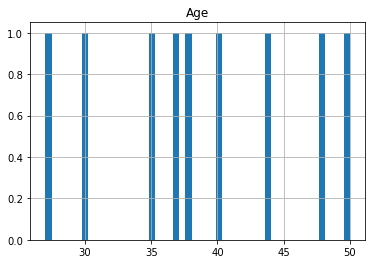

In [10]:
dataset.hist('Age', bins=50)


In [11]:
#creating metrix if features and X is an array
# : means all the line and :-1 all the columns - last column or feature.
X = dataset.iloc[:, :-1].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [12]:
y = dataset.iloc[:, 3].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'], dtype=object)

## 2.0 How to fix missing data

In [13]:
# there are few ways to treat missing data issue
# one way is to take mean to fix missinh data.

from sklearn.preprocessing import Imputer


In [14]:
# Imputer class needs parameters to pass to it.
# class sklearn.preprocessing.Imputer(missing_values=’NaN’, strategy=’mean’, axis=0, verbose=0, copy=True)[source]
# fit(X[, y])	Fit the imputer on X.
# fit_transform(X[, y])	Fit to data, then transform it.

imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [15]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## 3.0 Working with Categorical Variables.

In [16]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder() 
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])


In [17]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [18]:
# encoding dummy variable using label encoder

from sklearn.preprocessing import OneHotEncoder
onehotencoder  = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

In [19]:
X

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.40000000e+01,   7.20000000e+04],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.70000000e+01,   4.80000000e+04],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          3.00000000e+01,   5.40000000e+04],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.80000000e+01,   6.10000000e+04],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          4.00000000e+01,   6.37777778e+04],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.50000000e+01,   5.80000000e+04],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.87777778e+01,   5.20000000e+04],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.80000000e+01,   7.90000000e+04],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          5.00000000e+01,   8.30000000e+04],
       [  1.00000000e+00,   0.0000000

In [20]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [21]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

## 4.0 Splitting dataset into training and test.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [24]:
X_train

array([[  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          4.00000000e+01,   6.37777778e+04],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.70000000e+01,   6.70000000e+04],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.70000000e+01,   4.80000000e+04],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.87777778e+01,   5.20000000e+04],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.80000000e+01,   7.90000000e+04],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.80000000e+01,   6.10000000e+04],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.40000000e+01,   7.20000000e+04],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.50000000e+01,   5.80000000e+04]])

In [25]:
X_test

array([[  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          3.00000000e+01,   5.40000000e+04],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          5.00000000e+01,   8.30000000e+04]])

In [26]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [27]:
y_test

array([0, 0], dtype=int64)

## 5.0 Feature Scaling

In [28]:
# explain euclidean distance for feature scaling and also normalization and standardization.

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test =  sc_X.transform(X_test)

In [29]:
X_train

array([[-1.        ,  2.64575131, -0.77459667,  0.26306757,  0.12381479],
       [ 1.        , -0.37796447, -0.77459667, -0.25350148,  0.46175632],
       [-1.        , -0.37796447,  1.29099445, -1.97539832, -1.53093341],
       [-1.        , -0.37796447,  1.29099445,  0.05261351, -1.11141978],
       [ 1.        , -0.37796447, -0.77459667,  1.64058505,  1.7202972 ],
       [-1.        , -0.37796447,  1.29099445, -0.0813118 , -0.16751412],
       [ 1.        , -0.37796447, -0.77459667,  0.95182631,  0.98614835],
       [ 1.        , -0.37796447, -0.77459667, -0.59788085, -0.48214934]])

In [30]:
X_test

array([[-1.        ,  2.64575131, -0.77459667, -1.45882927, -0.90166297],
       [-1.        ,  2.64575131, -0.77459667,  1.98496442,  2.13981082]])

# Part2: Multiple Linear Regression

In [31]:
hdataset = pd.read_csv('C:/Udemy Machine Learning/Machine Learning A-Z Template Folder/Part 2 - Regression/Section 5 - Multiple Linear Regression/housing.csv')

In [32]:
hdataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
